# Importing the Required Tools

## Alpha Vantage

## Web Scrape

# Formatting the Data

## From the API

## From the Web Scraping

# Calculating the Percent Changes Daily Close to Close

# Graphs and Visualizations

Text(-0.34, 0.23, '$R^2$= 0.4808')

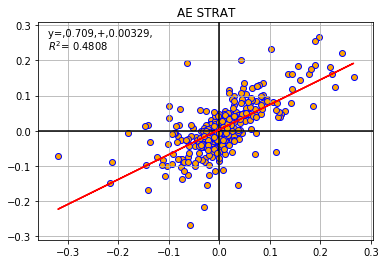

In [74]:
#Visualization

#Plotting percent change comparisions:
#linear regression line calculation

from scipy import stats
#linear regression line calculation
x = np.array(pct_change['AE Pct Change'])
y = np.array(pct_change['STRAT Pct Change'])
m, b = np.polyfit(x, y, 1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#Calculating R squared 
r_squared = round(r_value**2,4)


#plot percent changes of two coins with origin axis and major/minor grid
fig, ax = plt.subplots()
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

#ploting percent changes of two coins against each other
plt.scatter(pct_change['AE Pct Change'], pct_change['STRAT Pct Change'],edgecolors='blue', color = 'orange')
#plotting linear regression line from the scatter plot
plt.plot(x, x*m + b, 'red')
#title
plt.title('AE STRAT')

#regression line equation and R^2 number formatted to second quandrant
#utilizing latex notation for R^2
ax.annotate(f"y=,{round(m,3)},+,{round(b,5)}, ", xy=(0, 0), xytext=(-0.34, .27))
pylab.annotate(f"$R^2$= {r_squared}", xy=(0, 0), xytext=(-0.34, .23))

#exporting plot
# plt.savefig('AE_STRAT_scatter_regression.png', bbox_inches = 'tight', dpi = 400)

In [ ]:
#Miscellaneous Calculations and Plotting

#daily return calculations (based on the complete data of BTC)
BTC_whole_daily = round((BTC_whole['Close(USD)']-BTC_whole['Open(USD)'])/BTC_whole['Open(USD)']*100,2)

#plotting daily returns -takes lone time to run-
plt.scatter(BTC_whole['Date'],BTC_whole_daily)

#Plotting Closing prices over the data length with an inverted x-axis to have right side being present day
plt.gca().invert_xaxis()
plt.plot(closing_price['BTC Closing Price'])

In [ ]:
#heatmap from Seaborn with top 3 and bottom 3 cryptocurrencies
t3b3_heatmap = sns.heatmap(pct_change.corr(), 
        xticklabels=pct_change.corr(),
        yticklabels=pct_change.corr(), center = 1) #utilizing the blue color palette for the heat map
plt.savefig('heatmappctwithvalues.png', bbox_inches = 'tight', dpi = 400)

In [ ]:
#heatmap of correlations Seaborn with all the crypto currencies with studied

t3b3_heatmap = sns.heatmap(pct_change.corr(), 
        xticklabels=pct_change.corr(),
        yticklabels=pct_change.corr(), center = 1) #utilizing the blue color palette for the heat map
plt.savefig('heatmappctwithvalues.png', bbox_inches = 'tight', dpi = 400)

In [ ]:
#Creates date time in proper format in order to title graph
#calculates the number of days of our analysis so that we can enter it into an f string 

from datetime import date

date1 = date(2018, 3, 24)
date2= date(2019, 2, 11)
timedelta = date2 - date1
days = timedelta.days 


#reversing x axis, 0 being present day
plt.gca().invert_xaxis()


#plotting of all coins chosen, excluding BTC, ETH and ELA because there prices significantly higher
#than the others in our list

for col in closing_price.columns:
    if col != 'Date' and col != 'BTC Closing Price'and col != 'ETH Closing Price' and col != 'ELA Closing Price':
        plt.plot(closing_price[col].dropna())
plt.title("Daily Closing Prices for the last {} days EX BTC, ETH, ELA".format(days)) 

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))#Chart of Closing price excluding Bitcoin and Ethereum 

# Saves the figure sets the graph and legend to the right size and fit
plt.savefig("Closings price for last 324 days ex BTCETHELA.png, bbox_inches = 'tight', dpi =600")